In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

trainData = trainData.iloc[:8000]
testData = testData.iloc[:2000]

X_train = trainData.drop(columns=['label']).values
y_train = trainData['label'].values

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_test = testData.drop(columns=['label']).values
y_test = testData['label'].values

# Normalize the images (0-255 range to 0-1 range)
X_train = X_train / 255.0
X_test = X_test / 255.0

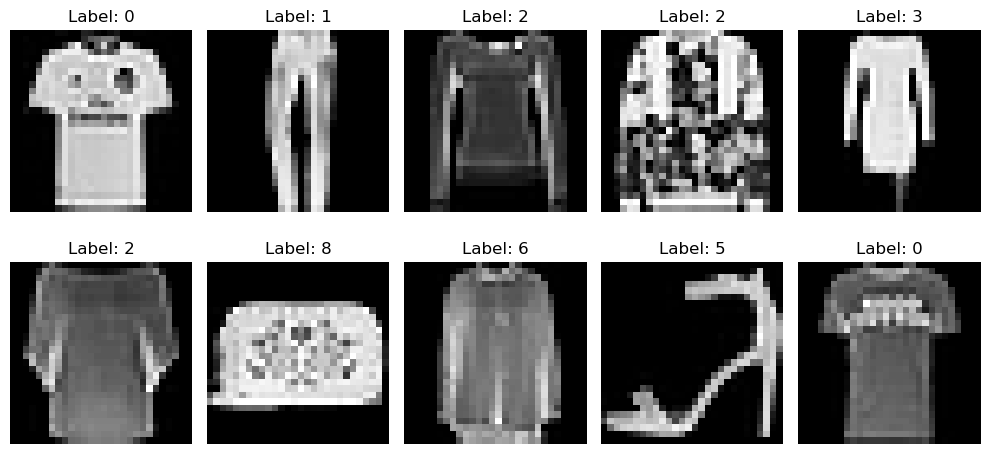

In [34]:
# Reshape images to 28x28 for visualization purposes
X_test_images = X_test.reshape(-1, 28, 28)

# Plot 10 random images from the test dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_images[i], cmap='gray')
    plt.title(f'Label: {y_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Define hyperparameters
layer_sizes = [128, 64, 32]
max_iter = 200
batch_size = 128
learning_rate = 2e-5
activations = ['logistic', 'tanh', 'relu', 'identity']
 
train_loss_dict = {activation: [] for activation in activations}
val_loss_dict = {activation: [] for activation in activations}
train_accuracy_dict = {activation: [] for activation in activations}
val_accuracy_dict = {activation: [] for activation in activations}

test_scores = {}
for activation in activations: 
    model = MLPClassifier(hidden_layer_sizes=layer_sizes, activation=activation, 
                          solver='adam', max_iter=1, batch_size=batch_size, 
                          learning_rate_init=learning_rate, warm_start=True, verbose=False)
 
    train_loss = []
    val_loss = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(max_iter): 
        model.fit(X_train, y_train)
         
        y_train_pred_proba = model.predict_proba(X_train)
        y_val_pred_proba = model.predict_proba(X_val)
        train_score = model.score(X_train, y_train)
        val_score = model.score(X_val, y_val)
        
        train_loss.append(log_loss(y_train, y_train_pred_proba))
        val_loss.append(log_loss(y_val, y_val_pred_proba))
        train_accuracy.append(train_score)
        val_accuracy.append(val_score)
        
    
    train_loss_dict[activation] = train_loss
    val_loss_dict[activation] = val_loss
    train_accuracy_dict[activation] = train_accuracy
    val_accuracy_dict[activation] = val_accuracy
    
    test_score = model.score(X_test, y_test)
    test_scores[activation] = test_score

    print(f"Completed training with activation: {activation}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilay

Completed training with activation: logistic


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilay

Completed training with activation: tanh


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilay

Completed training with activation: relu


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilay

Completed training with activation: identity


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


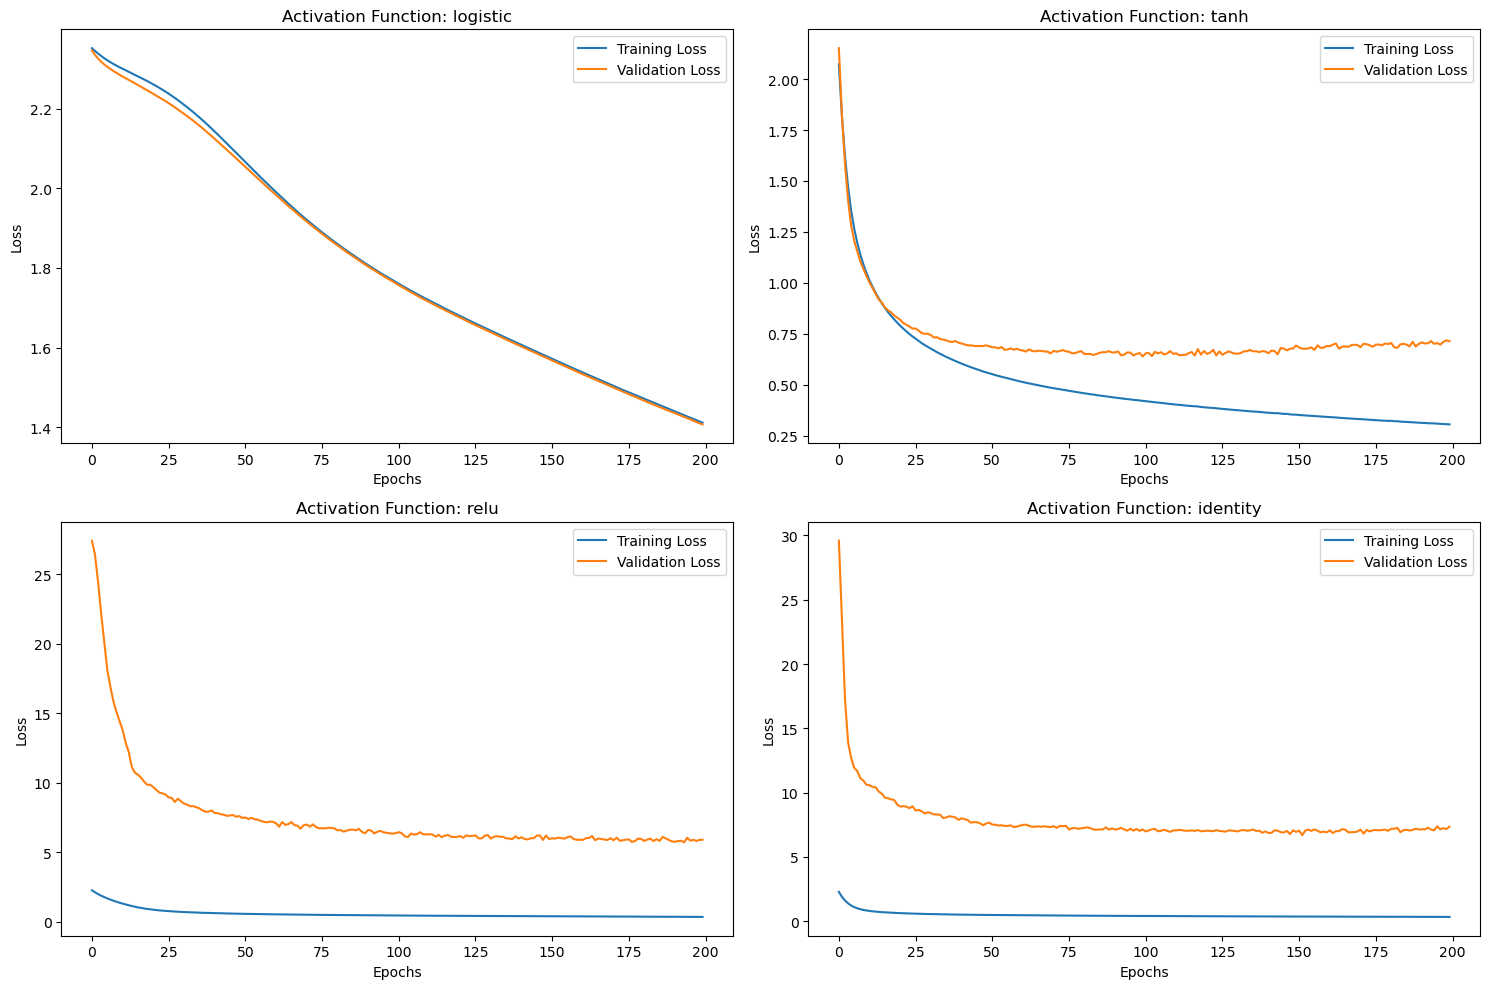

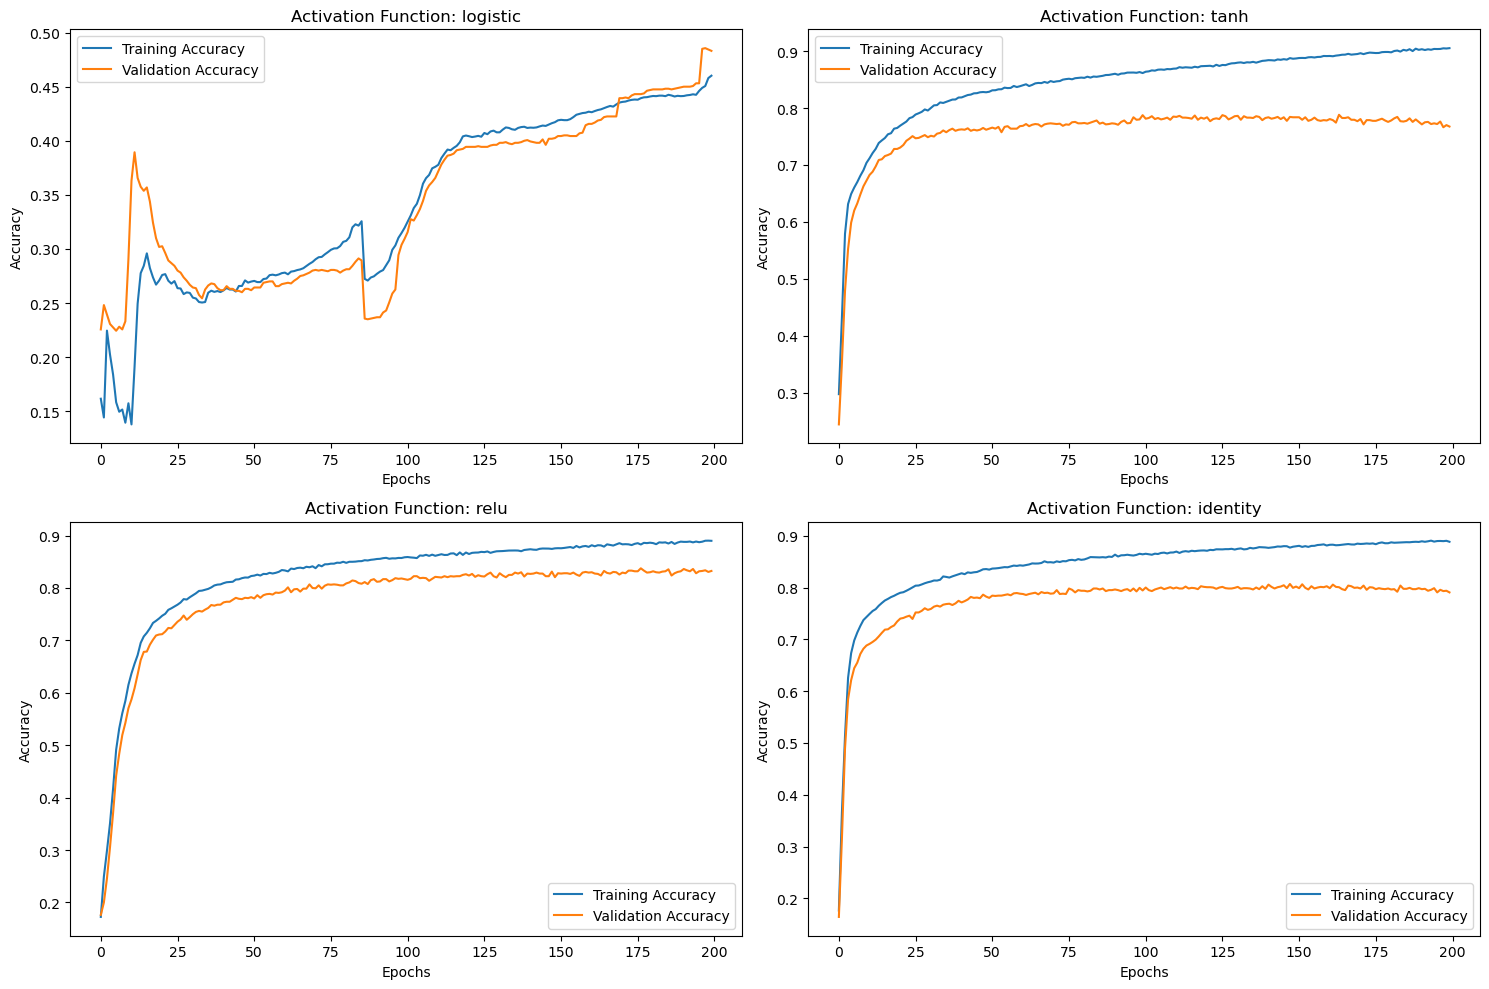

Validation Accuracy by Activation Function:
logistic: 0.4525
tanh: 0.8505
relu: 0.8455
identity: 0.8375


In [6]:
# Plotting training and validation loss vs. epochs for each activation function
plt.figure(figsize=(15, 10))
for i, activation in enumerate(activations, 1):
    plt.subplot(2, 2, i)
    plt.plot(range(max_iter), train_loss_dict[activation], label='Training Loss')
    plt.plot(range(max_iter), val_loss_dict[activation], label='Validation Loss')
    plt.title(f'Activation Function: {activation}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()

plt.show()

plt.figure(figsize=(15, 10))
for i, activation in enumerate(activations, 1):
    plt.subplot(2, 2, i)
    plt.plot(range(max_iter), train_accuracy_dict[activation], label='Training Accuracy')
    plt.plot(range(max_iter), val_accuracy_dict[activation], label='Validation Accuracy')
    plt.title(f'Activation Function: {activation}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()

plt.show()


# Output test scores for comparison
print("Validation Accuracy by Activation Function:")
for activation, score in test_scores.items():
    print(f"{activation}: {score:.4f}")

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier 

best_activation = 'relu'  

param_grid = {
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [1e-4, 1e-3, 1e-2, 2e-5, 2e-4],
    'batch_size': [64, 128, 256],
    # 'hidden_layer_sizes': [(128, 64, 32)], 
    # 'max_iter': [100, 200] 
}
 
mlp = MLPClassifier(activation=best_activation)
 
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)
 
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_

Best Parameters from Grid Search:
{'batch_size': 128, 'learning_rate_init': 0.0001, 'solver': 'adam'}
Best Cross-Validation Score: 0.8578


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilay

Completed training with activation: relu


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilay

Completed training with activation: identity


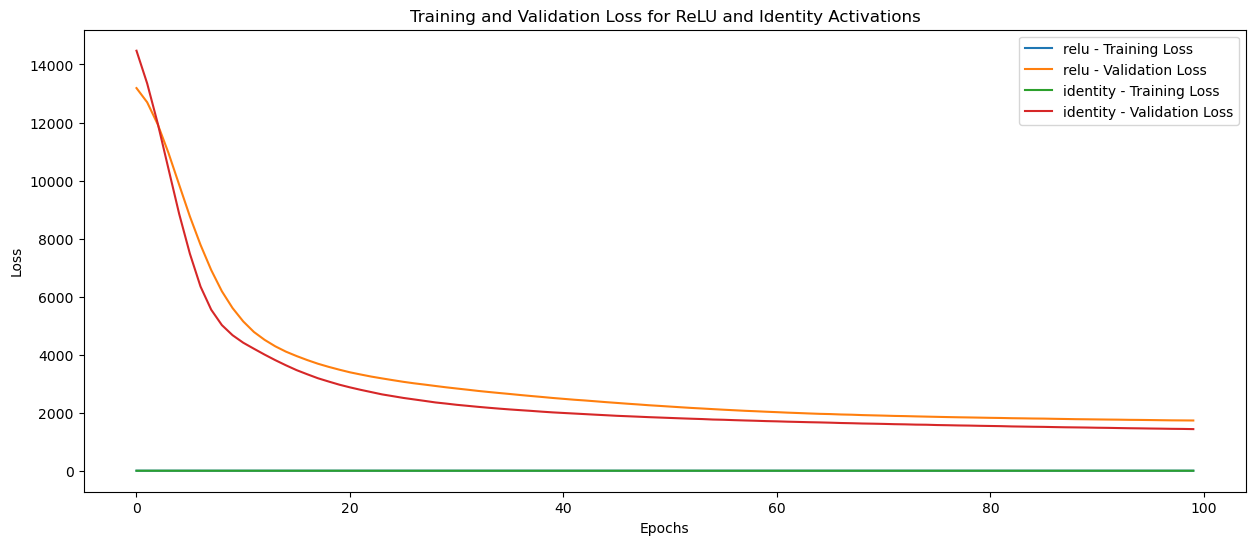

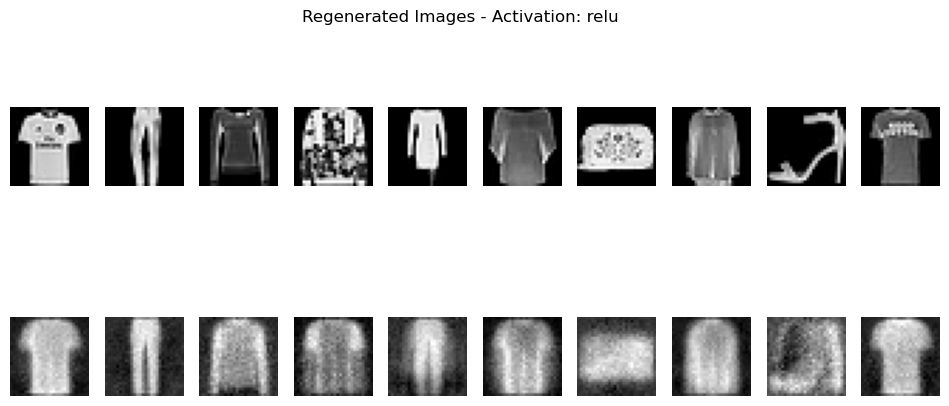

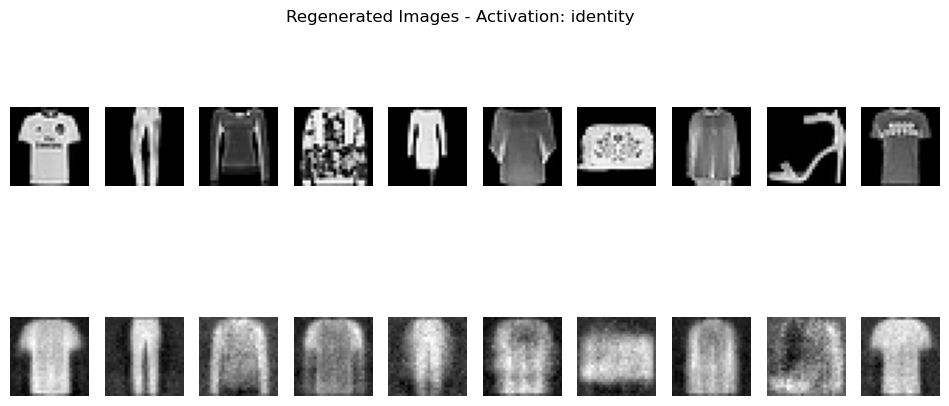

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

c, b, a = 128, 64, 32
layer_sizes = [c, b, a, b, c]
max_iter = 100
learning_rate = 2e-5
activations = ['relu', 'identity'] 
 
train_loss_dict = {activation: [] for activation in activations}
val_loss_dict = {activation: [] for activation in activations}
models = {}
 
X_train_main, X_val = X_train, X_test
 
def plot_images(original, regenerated, title):
    plt.figure(figsize=(12, 5))
    for i in range(10): 
        plt.subplot(2, 10, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.ylabel("Original")
         
        plt.subplot(2, 10, i + 11)
        plt.imshow(regenerated[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.ylabel("Regenerated")

    plt.suptitle(title)
    plt.show()

for activation in activations: 
    model = MLPRegressor(hidden_layer_sizes=layer_sizes, activation=activation,
                         solver='adam', max_iter=1, batch_size=128, 
                         learning_rate_init=learning_rate, warm_start=True)
 
    train_loss = []
    val_loss = [] 
    
    for epoch in range(max_iter): 
        model.fit(X_train_main, X_train_main)   
        y_train_pred = model.predict(X_train_main)
        y_val_pred = model.predict(X_val)
         
        train_loss.append(mean_squared_error(X_train_main, y_train_pred))
        val_loss.append(mean_squared_error(X_val, y_val_pred))
 
    train_loss_dict[activation] = train_loss
    val_loss_dict[activation] = val_loss
    
    models[activation] = model
      
    print(f"Completed training with activation: {activation}")

plt.figure(figsize=(15, 6))
for i, activation in enumerate(activations):
    plt.plot(range(max_iter), train_loss_dict[activation], label=f'{activation} - Training Loss')
    plt.plot(range(max_iter), val_loss_dict[activation], label=f'{activation} - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for ReLU and Identity Activations')
plt.legend()
plt.show()

for activation in activations:
    model = MLPRegressor(hidden_layer_sizes=layer_sizes, activation=activation,
                         solver='adam', max_iter=max_iter, batch_size=128,
                         learning_rate_init=learning_rate)
    model.fit(X_train, X_train)  
    
    X_test_sample = X_test[:10]
    regenerated_images = model.predict(X_test_sample)

    plot_images(X_test_sample, regenerated_images, title=f'Regenerated Images - Activation: {activation}')

In [26]:
from sklearn.metrics import accuracy_score


# forward pass up to the middle layer
def extract_features(model, data, layer_index=2):
    # manual forward pass to the specified hidden layer
    activations = data
    for i in range(layer_index + 1):
        activations = np.dot(activations, model.coefs_[i]) + model.intercepts_[i]
        if i < layer_index:
            # activation function for hidden layers
            if model.activation == 'relu':
                activations = np.maximum(0, activations)  # ReLU
            elif model.activation == 'identity':
                pass  # Identity function does nothing
    return activations

# features from the trained models for each activation function
X_train_features = {}
X_test_features = {}

for activation in activations:
    model = MLPRegressor(hidden_layer_sizes=layer_sizes, activation=activation,
                         solver='adam', max_iter=max_iter, batch_size=128,
                         learning_rate_init=learning_rate)
    model.fit(X_train, X_train)
    
    # Extract feature vectors of size 'a' for both train and test datasets
    X_train_features[activation] = extract_features(model, X_train, layer_index=2)
    X_test_features[activation] = extract_features(model, X_test, layer_index=2)

# two new classifiers on the extracted features 
for activation in activations:
    classifier = MLPClassifier(hidden_layer_sizes=(a, a), activation=activation,
                               solver='adam', max_iter=200, learning_rate_init=learning_rate)
    
    classifier.fit(X_train_features[activation], y_train)
    y_train_pred = classifier.predict(X_train_features[activation])
    y_test_pred = classifier.predict(X_test_features[activation])
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Activation: {activation}")
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%\n")


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Training Accuracy: 71.19%
Test Accuracy: 70.40%

Activation: identity
Training Accuracy: 72.81%
Test Accuracy: 71.35%



/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
